/tmp/ipykernel_322474/2198680907.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_322474/2198680907.py:16: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(


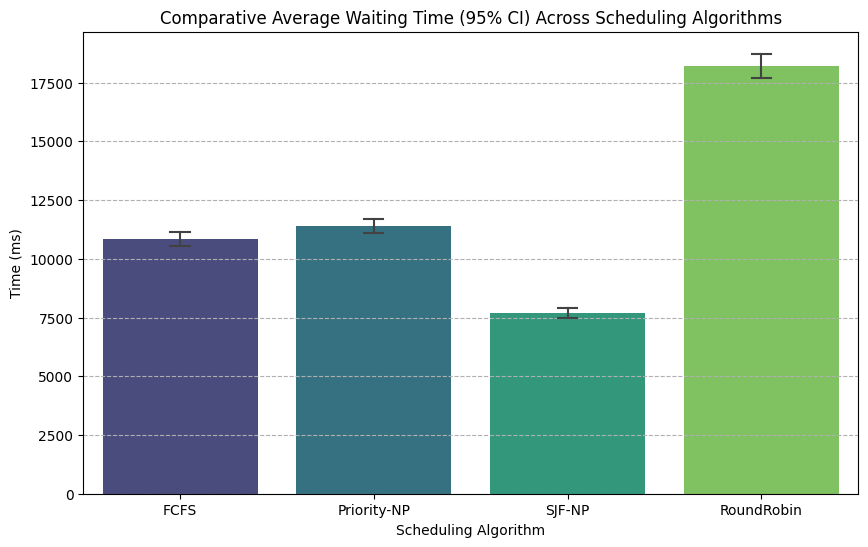

/tmp/ipykernel_322474/2198680907.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


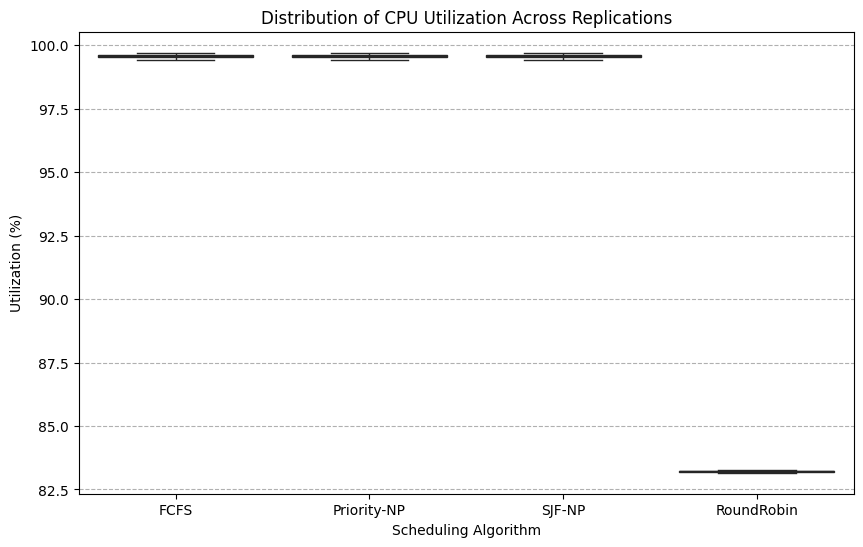

/tmp/ipykernel_322474/2198680907.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


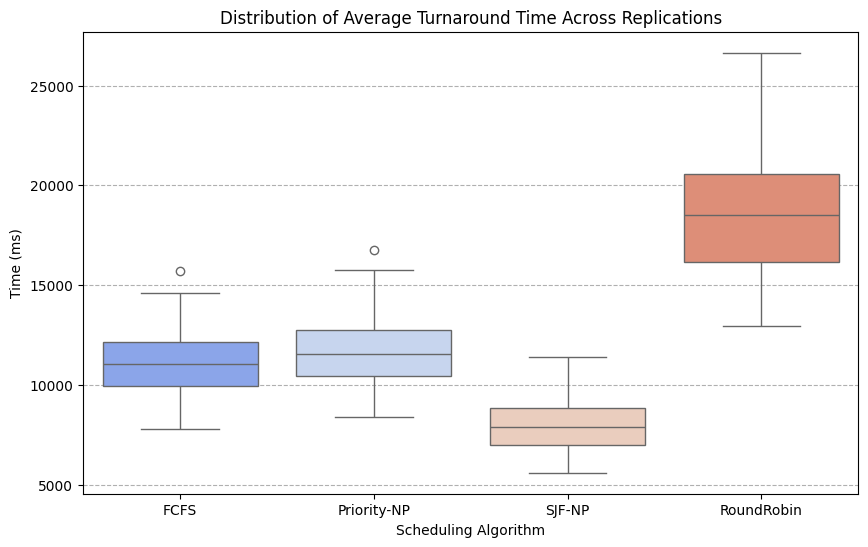

/tmp/ipykernel_322474/2198680907.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


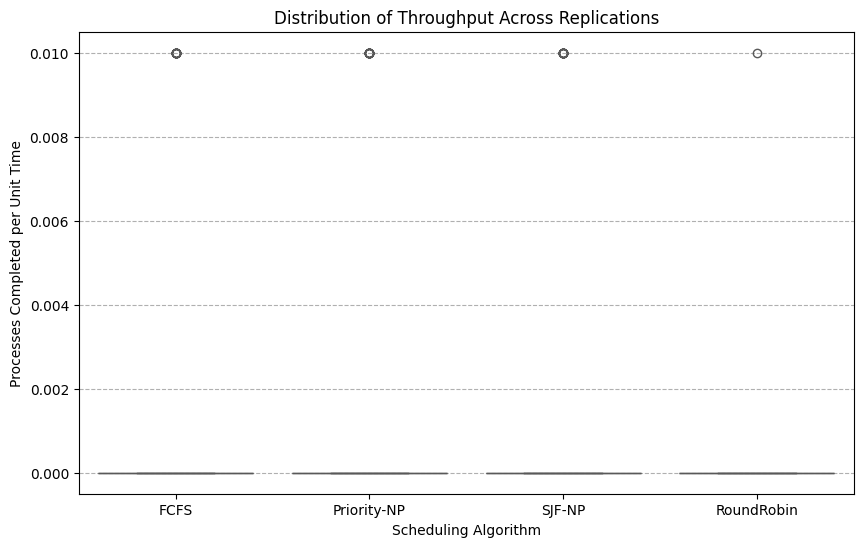

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data generated by the Java simulation
df = pd.read_csv('simulation_results.csv')

# --- PLOT 1: Average Waiting Time with 95% Confidence Intervals (CI) ---

# Filter for the specific metric
wait_df = df[df['Metric'] == 'AvgWaitingTime']

plt.figure(figsize=(10, 6))
# Create a bar plot, with error bars representing the 95% CI 
# (Seaborn's barplot automatically computes mean and CI)
sns.barplot(
    x='Algorithm', 
    y='Value', 
    data=wait_df, 
    capsize=0.1, 
    errwidth=1.5,
    palette="viridis"
)
plt.title('Comparative Average Waiting Time (95% CI) Across Scheduling Algorithms')
plt.ylabel('Time (ms)')
plt.xlabel('Scheduling Algorithm')
plt.grid(axis='y', linestyle='--')
plt.show()


# --- PLOT 2: CPU Utilization Comparison (Box Plot) ---

# Filter for CPU Utilization
cpu_df = df[df['Metric'] == 'CPUUtilization']

plt.figure(figsize=(10, 6))
# Box plots show the distribution of results across the 30 replications
sns.boxplot(
    x='Algorithm', 
    y='Value', 
    data=cpu_df, 
    palette="magma"
)
plt.title('Distribution of CPU Utilization Across Replications')
plt.ylabel('Utilization (%)')
plt.xlabel('Scheduling Algorithm')
plt.grid(axis='y', linestyle='--')
plt.show()

# --- PLOT 3: Turnaround Time Comparison (Box Plot) ---
turnaround_df = df[df['Metric'] == 'AvgTurnaroundTime']

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Algorithm',
    y='Value',
    data=turnaround_df,
    palette="coolwarm"
)
plt.title('Distribution of Average Turnaround Time Across Replications')
plt.ylabel('Time (ms)')
plt.xlabel('Scheduling Algorithm')
plt.grid(axis='y', linestyle='--')
plt.show()
x
# --- PLOT 4: Throughput Comparison (Box Plot) ---
throughput_df = df[df['Metric'] == 'Throughput']
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Algorithm',
    y='Value',
    data=throughput_df,
    palette="Set2"
)
plt.title('Distribution of Throughput Across Replications')
plt.ylabel('Processes Completed per Unit Time')
plt.xlabel('Scheduling Algorithm')
plt.grid(axis='y', linestyle='--')
plt.show()

In [17]:
# Group by Algorithm and Metric, compute descriptives
descriptives = df.groupby(['Algorithm', 'Metric'])['Value'].agg(
    ['mean', 'median', 'std', 'min', 'max']
).reset_index()

# Print or save to CSV for report
print(descriptives)
descriptives.to_csv('descriptive_stats.csv', index=False)


      Algorithm             Metric        mean     median          std  \
0          FCFS  AvgTurnaroundTime  11067.2966  11062.065  1489.336702   
1          FCFS     AvgWaitingTime  10837.9315  10833.575  1460.043850   
2          FCFS     CPUUtilization     99.5628     99.570     0.058207   
3          FCFS         Throughput      0.0018      0.000     0.003861   
4   Priority-NP  AvgTurnaroundTime  11611.0520  11559.085  1572.255414   
5   Priority-NP     AvgWaitingTime  11381.6869  11326.255  1542.943881   
6   Priority-NP     CPUUtilization     99.5628     99.570     0.058207   
7   Priority-NP         Throughput      0.0018      0.000     0.003861   
8    RoundRobin  AvgTurnaroundTime  18449.3785  18497.545  2772.590952   
9    RoundRobin     AvgWaitingTime  18220.0134  18263.970  2743.397709   
10   RoundRobin     CPUUtilization     83.2112     83.210     0.020463   
11   RoundRobin         Throughput      0.0001      0.000     0.001000   
12       SJF-NP  AvgTurnaroundTime   7

In [11]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# For each metric, perform ANOVA
metrics = df['Metric'].unique()
for metric in metrics:
    metric_df = df[df['Metric'] == metric]
    
    # ANOVA: Test if means differ by Algorithm
    groups = [metric_df[metric_df['Algorithm'] == alg]['Value'] for alg in metric_df['Algorithm'].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    print(f"{metric} ANOVA: F={f_val:.2f}, p={p_val:.4f}")  # If p < 0.05, differences are significant
    
    # Post-hoc: Tukey's HSD for pairwise
    tukey = pairwise_tukeyhsd(endog=metric_df['Value'], groups=metric_df['Algorithm'], alpha=0.05)
    print(tukey)


AvgWaitingTime ANOVA: F=22.97, p=0.0000
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
       FCFS Priority-NP    0.625 0.9985  -9.3632  10.6132  False
       FCFS  RoundRobin   21.082    0.0  11.0938  31.0702   True
       FCFS      SJF-NP  -10.226 0.0425 -20.2142  -0.2378   True
Priority-NP  RoundRobin   20.457    0.0  10.4688  30.4452   True
Priority-NP      SJF-NP  -10.851 0.0272 -20.8392  -0.8628   True
 RoundRobin      SJF-NP  -31.308    0.0 -41.2962 -21.3198   True
----------------------------------------------------------------
AvgTurnaroundTime ANOVA: F=17.21, p=0.0000
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
       FCFS Priority-NP    0.625  0.999 -10.9141  12.1641  False
       